# DATA100 S15 - House Prices EDA

#### Submitted by: Group 10

<b>CORNELIO</b>, Job - 3rd Year, COS<br>
<b>AMOS</b>, Cy Adrienne C. - nth Year, College<br>
<b>SIOCO</b>, Megan Rylene A. - 3rd Year, CCS<br> 
<b>SULIT</b>, Anne Gabrielle M. - 4th Year, CCS


#### Submitted to:
MR. EDUARDO F. VALDEZ

## 1. Introduction

Discuss problem. Establish kind of task to do.

### The Dataset


This project uses the [House Sales in King County](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data) dataset from Kaggle that contains house sale transactions for King County, including Seattle, WA, and the USA. It includes homes sold between May 2014 and May 2015. Each data instance contains details about each property’s physical attributes, location, and transaction history, all of which are essential to find out what factors influence house sales. As recommended, the dataset can be viewed as a regression task.


The notebook will refer to this dataset as `house_prices_df`. It is provided as a single .csv file where each row represents a property transaction, and each column corresponds to a specific attribute of that property. 

**Dataset Structure**
- **Observations**: 21,614
- **Variables**: 20


**Transaction Attributes (2)**:
- **`date`**: Date of sale for the house.
- **`price`**: Sale price of the house in USD.

**House Attributes (18)**:
- **`bedrooms`**: Number of bedrooms in the house.
- **`bathrooms`**: Number of bathrooms in the house.
- **`sqft_living`**: Living area size in square feet.
- **`sqft_lot`**: Total lot size in square feet.
- **`floors`**: Number of floors in the house.
- **`waterfront`**: Indicates if the house has a waterfront view (1 = Yes, 0 = No).
- **`view`**: Quality of the view from the house, rated from 0 (no view) to 4 (excellent view).
- **`condition`**: Condition of the house on a scale from 1 (poor) to 5 (excellent).
- **`grade`**: Construction quality grade based on materials and workmanship, with higher grades indicating better quality.
- **`sqft_above`**: Size of the above-ground area in square feet.
- **`sqft_basement`**: Size of the basement area in square feet.
- **`yr_built`**: Year the house was built.
- **`yr_renovated`**: Year the house was last renovated (0 if never renovated).
- **`zipcode`**: 5-digit postal code for the house location.
- **`lat`**: Latitude coordinate of the house location.
- **`long`**: Longitude coordinate of the house location.
- **`sqft_living15`**: Average interior living space in square feet for the nearest 15 houses.
- **`sqft_lot15`**: Average lot size in square feet for the nearest 15 houses.

**Identifier (1)**:
- **`Id`**: Unique identifier for each house.

## 2. List of Requirements

**Importing Libraries**

In [11]:
import pandas as pd
import numpy as np

**Loading the Dataset**

In [13]:
house_prices_df = pd.read_csv('kc_house_data.csv')
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Importing the HousePrices Class**

In [15]:
from house_prices import HousePrices

## 3. Exporatory Analysis

Describe data and show what kind of initial features you are dealing with. You can point anomalies / outliers in the data. Discuss patterns or findings.

## 4. Data Cleaning

As seen in Section 2 when loading the dataset, its column names and data types are already appropriate for each attribute. This section will focus on checking for possible null values and preparing the dataset for EDA.

First, we check if the dataset has any missing or null values: 

In [20]:
missing_values = house_prices_df.isnull().sum()
missing_values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We conclude that the dataset has no null values. 

Next, we assess outlier data from the dataset. Our group has categorized the dataset's 20 variables into the following four categories. For each of these categories, we will apply a different approach to checking and possibly cleaning the data.

- Continuous Variables
- Discrete/Ordinal Variables
- Binary Variables
- Other Variables

**4.1. Continuous Variables (9):**

- `price`
- `sqft_living`
- `sqft_lot`
- `sqft_above`
- `sqft_basement`
- `lat`
- `long`
- `sqft_living15`
- `sqft_lot15`

These are the most relevant for outlier detection. Let us check for the outliers of each variable using the z-square method and plotting as a boxplot.


Z-Score Outlier Summary:
----------------------------------------
price: 406 outliers (1.88% of values)
sqft_living: 248 outliers (1.15% of values)
sqft_lot: 347 outliers (1.61% of values)
sqft_above: 254 outliers (1.18% of values)
sqft_basement: 247 outliers (1.14% of values)
long: 233 outliers (1.08% of values)
sqft_living15: 237 outliers (1.10% of values)
sqft_lot15: 363 outliers (1.68% of values)


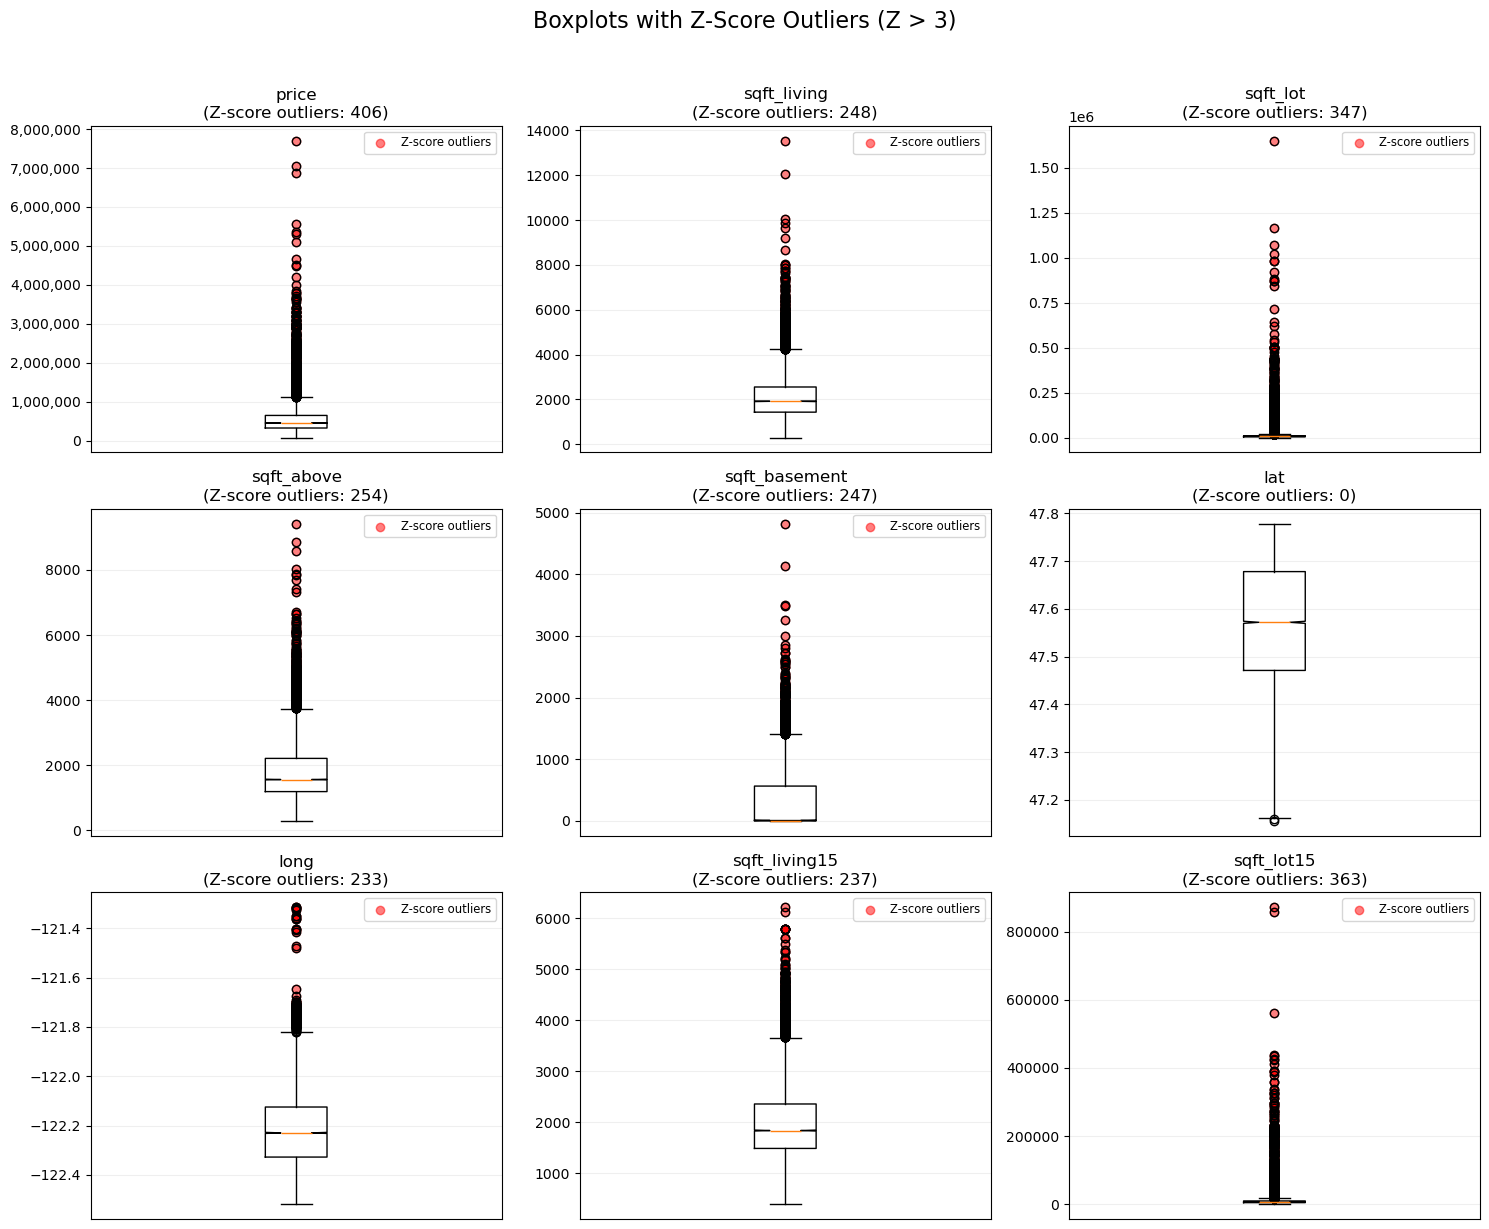

In [23]:
fig, outliers = HousePrices.create_zscore_boxplot(house_prices_df, 3)

From this data, we can see that all continuous variables except `long` are composed of outliers less than 2% of their total observations. We will analyze some outlier samples from each of the variables to see if any dataset changes have to be made.

In [25]:
HousePrices.print_outlier_details(house_prices_df, outliers)


                            OUTLIER ANALYSIS SUMMARY                            

--------------------------------------------------------------------------------
------------------------------------ PRICE -------------------------------------
--------------------------------------------------------------------------------

Outlier Count: 406 (1.88% of values)
Mean:           2,276,498.67
Median:         2,000,000.00
Std Dev:        768,582.68

Smallest outliers:
  • 1,646,000.00
  • 1,648,000.00
  • 1,650,000.00
  • 1,650,000.00
  • 1,650,000.00

Largest outliers:
  • 5,350,000.00
  • 5,570,000.00
  • 6,885,000.00
  • 7,062,500.00
  • 7,700,000.00

--------------------------------------------------------------------------------
--------------------------------- SQFT_LIVING ----------------------------------
--------------------------------------------------------------------------------

Outlier Count: 248 (1.15% of values)
Mean:           5,823.69
Median:         5,480.00
Std Dev:  

This outlier data summary shows that most outliers likely describe high-end or luxury state mansions in the real estate market. Upon further research of maximum property dimensions in King County, these values are reasonable and still stuiable for this study. Therefore, among the continuous variables, no data alterations will be made.

**4.2. Discrete/Ordinal Variables (6):**

- `bedrooms`
- `bathrooms`
- `floors`
- `view`
- `condition`
- `grade`

**4.3. Binary Variables (1):**

- `waterfront`

Some of these variables are measured on a scale (`view`, `condition`, `grade`, `waterfront`), while the other variables should be whole integer numbers. We will investigate their unique values and data types to ascertain this.

In [27]:
print("Unique values for:")
print("View: ", sorted(house_prices_df['view'].unique()))
print("Condition: ", sorted(house_prices_df['condition'].unique()))
print("Grade: ", sorted(house_prices_df['grade'].unique()))
print("Waterfront: ", sorted(house_prices_df['waterfront'].unique()))

Unique values for:
View:  [0, 1, 2, 3, 4]
Condition:  [1, 2, 3, 4, 5]
Grade:  [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Waterfront:  [0, 1]


In [28]:
house_prices_df[['bedrooms', 'bathrooms', 'floors']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   21613 non-null  int64  
 1   bathrooms  21613 non-null  float64
 2   floors     21613 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 506.7 KB


These results reveal that all ordinal and binary variables only contain values from their scales. The `bedroom` values are also no problem. However, there cannot be decimal values for the number of bathrooms and floors. To solve this, `bathrooms` and `floors` columns will be split into `full_` and `partial_` columns instead. If an observation has 2.25 floors, then `full_floors = 2` and `partial_floors = 0.25`. If the floor has no decimal value, then `partial_floors = 0.0`. This will be applied to all observations. 

In [30]:
result_df = house_prices_df.copy()

# Split
result_df['full_bathrooms'] = result_df['bathrooms'].astype(float).apply(np.floor)
result_df['partial_bathrooms'] = result_df['bathrooms'].astype(float) % 1
result_df['full_floors'] = result_df['floors'].astype(float).apply(np.floor)
result_df['partial_floors'] = result_df['floors'].astype(float) % 1

# Round off and convert
result_df['partial_bathrooms'] = result_df['partial_bathrooms'].round(2)
result_df['partial_floors'] = result_df['partial_floors'].round(2)
result_df['full_bathrooms'] = result_df['full_bathrooms'].astype(int)
result_df['full_floors'] = result_df['full_floors'].astype(int)

result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21613 non-null  int64  
 1   date               21613 non-null  object 
 2   price              21613 non-null  float64
 3   bedrooms           21613 non-null  int64  
 4   bathrooms          21613 non-null  float64
 5   sqft_living        21613 non-null  int64  
 6   sqft_lot           21613 non-null  int64  
 7   floors             21613 non-null  float64
 8   waterfront         21613 non-null  int64  
 9   view               21613 non-null  int64  
 10  condition          21613 non-null  int64  
 11  grade              21613 non-null  int64  
 12  sqft_above         21613 non-null  int64  
 13  sqft_basement      21613 non-null  int64  
 14  yr_built           21613 non-null  int64  
 15  yr_renovated       21613 non-null  int64  
 16  zipcode            216

**4.4. Other Variables (4):**

- `date`
- `yr_built` (year)
- `yr_renovated` (year, with 0 for never renovated)
- `zipcode` (categorical)

To assess these data variables, we will quickly check what the unique values of each variable are. Since these are case-to-case variables, we focus on checking whether they are within reasonable range. We will also use `result_df` as the primary dataframe moving forward.

In [32]:
HousePrices.check_special_variables(result_df)


=== Year Built Analysis ===
Unique values: [1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

Value counts:
yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
Name: count, dtype: int64

Total unique years: 116

=== Year Renovated Analysis ===
Unique values: [0, 1934, 1940, 1944, 1945, 1946, 1948, 1950, 1951, 1953, 1954, 1955, 1956, 

Based on this analysis, all variables are within the correct and reasonable ranges. 

To summarize Section 4, after checking for the outliers and possible null values of every variable in this dataset, only the `bathrooms` and `floors` attributes required modification (splitting). These two new columns are appended to the dataframe `result_df`.

## 5. Feature Extraction

This dataset has many possible feature columns to extract. The group assessed these and will append the most usesful features to append to `result_df`. 

**Section 4 added features (4):**
- **`full_bathrooms`**: Number of int/full bathrooms. Extracted from `bathrooms`.
- **`partial_bathrooms`**: Number of float/partial bathrooms. Extracted from `bathrooms`.
- **`full_floors`**: Number of int/full floors. Extracted from `floors`.
- **`partial_floors`**: Number of float/partial floors/ Extracted from `floors`.

**Section 5 new features (12):**
- **`year_sale`**: Year the house was sold. Extracted from `date`.
- **`month_sale`**: Month the house was sold. Extracted from `date`.
- **`day_sale`**: Day of the week the house was sold. Extracted from `date`.
- **`age`**: Number of years since the house was built. Derived from `yr_built`.
- **`time_since_renovation`**: Number of years since last renovation. If the house has not been renovated yet, this value is equal to `age`. Derived from `yr_renovated`.
- **`living_area_ratio`**: The ratio of `sqft_living` to `sqft_lot`. This helps visualize property utilization.
- **`bedroom_bathroom_ratio`**: The ratio of `bedrooms` to `full_bathrooms`. This helps visualize how many bathrooms exist per bedroom in each house.
- **`rooms_per_floor`**: The ratio of rooms (`bedrooms` and `full_bathrooms`) to the `full_floors` of the house. This also helps visualize property utilization.
- **`relative_living_space`**: The ratio of `sqft_living` to `sqft_living15`. This helps compare the living room space of this house and those of the nearest 15 houses.
- **`relative_lot_space`**: The ratio of `sqft_lot` to `sqft_lot15`. This helps compare the lot space of this house and those of the nearest 15 houses.
- **`area`**: Type of area of the house (urban, suburban, rural). Extracted from `zipcode` in king county. 
- **`neighborhood_groupings`**: The neighborhood group derived by the Kmeans method on the `long` and `lat`.

The group will derive these features in groups.
- Date-related features
- Age and renovation features
- Ratios
- Area classifications
- Neighborhood clustering

**5.1. Date-Related Features (3):**

Using basic date extraction methods, we will generate the `year_sale`, `month_sale`, and `day_sale` columns. These columns will be useful for determining whether specific years, months, or days of the week impacted the price of a house.  

In [37]:
new_features_df = result_df.copy()

new_features_df['date'] = pd.to_datetime(new_features_df['date'])
new_features_df['year_sale'] = new_features_df['date'].dt.year
new_features_df['month_sale'] = new_features_df['date'].dt.month
new_features_df['week_day'] = new_features_df['date'].dt.day_name()

**5.2. Age and Renovation Features (2):**

This subsection will extract the `age` and `time_since_renovation` columns from the dataframe. These attributes, together with the `grade` and `condition` columns already present in the dataset, can help us identify whether the longevity, condition, and age of a house affect its price or is affected by its location.

In [39]:
current_year = 2024
new_features_df['age'] = current_year - new_features_df['yr_built']

new_features_df['time_since_renovation'] = np.where(
    new_features_df['yr_renovated'] == 0,
    new_features_df['age'],
    current_year - new_features_df['yr_renovated']
)

**5.3. Ratios (5):**

There are several sqft ratios the group wanted to derive from this dataset: `living_area_ratio`, `bedroom_bathroom_ratio`, `rooms_per_floor`, `relative_living_space`, 
and `relative_lot_space`. These help us identify how much each property's space is being utilized. Does lesser utilization mean that these houses are high-end luxury homes? Are there other factors to consider? These attributes also help us identify how well-to-do a house is compared to its nearby properties. 

In [41]:
new_features_df['living_area_ratio'] = (new_features_df['sqft_living'] / new_features_df['sqft_lot']).round(2)
new_features_df['bedroom_bathroom_ratio'] = (new_features_df['bedrooms'] / new_features_df['full_bathrooms']).round(2)
new_features_df['rooms_per_floor'] = ((new_features_df['bedrooms'] + new_features_df['full_bathrooms']) / new_features_df['full_floors']).round(2)

new_features_df['relative_living_space'] = (new_features_df['sqft_living'] / new_features_df['sqft_living15']).round(2)
new_features_df['relative_lot_space'] = (new_features_df['sqft_lot'] / new_features_df['sqft_lot15']).round(2)

**5.4. Area Classifications (1):**

This subsection is dedicated to extracting the `area` column from the zipcodes column. According to King County's government website (2013), the group derived three area classifcations (urban, suburban, and rural) from the government's Incorporated Areas heatmap. These indicate how populated or richly developed a zipcode's area is. This information can help us ascertain whether houses in more urban areas typically have higher prices than those in rural areas, or whether other factors are at play.

In [43]:
def classify_area(zipcode):
    urban_zipcodes = ['98102', '98103', '98105', '98106', '98107', '98108', 
                      '98109', '98112', '98115', '98116', '98117', '98118', 
                      '98119', '98122', '98125', '98126', '98133', '98144', 
                      '98199'] # Downtown Seattle, Capitol Hill, etc

    suburban_zipcodes = ['98001', '98002', '98003', '98004', '98005', '98006', 
                         '98007', '98008', '98011', '98027', '98028', '98029', 
                         '98030', '98031', '98032', '98033', '98034', '98038', 
                         '98039', '98040', '98042', '98052', '98053', '98055', 
                         '98056', '98058', '98059', '98072', '98074', '98075', 
                         '98146', '98148', '98155', '98166', '98168', '98177', 
                         '98178', '98188', '98198'] # Bellevue area, Kent, etc
    
    if str(zipcode) in urban_zipcodes:
        return 'urban'
    elif str(zipcode) in suburban_zipcodes:
        return 'suburban'
    else:
        return 'rural'
                
new_features_df['area'] = new_features_df['zipcode'].apply(classify_area)

**5.5. Neighborhood Clustering (1):**

Using the Kmeans method, the researchers wanted to create clusters to identify regional trends in the dataset. To determine how many clusters ought to be used for Kmeans, the group used the elbow method and calculated the silhouette score of the relevant clusters.

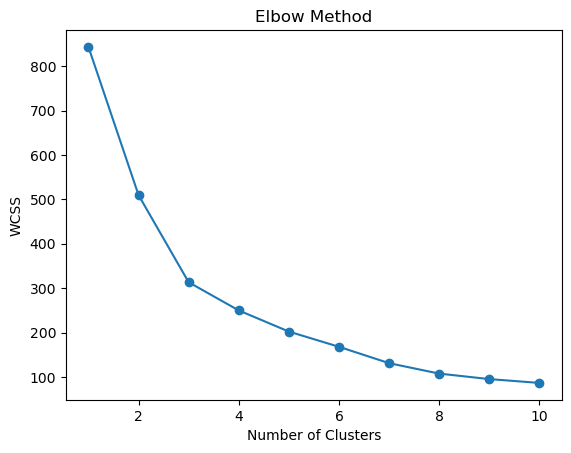

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
coords = new_features_df[['long', 'lat']].values
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(coords)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
# from sklearn.metrics import silhouette_score

# for i in range(2, 11):
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     cluster_labels = kmeans.fit_predict(coords)
#     score = silhouette_score(coords, cluster_labels)
#     print(f'Clusters: {i}, Silhouette Score: {score}')

Clusters: 2, Silhouette Score: 0.3825116783589589
Clusters: 3, Silhouette Score: 0.4306667292964727
Clusters: 4, Silhouette Score: 0.40906601793211356
Clusters: 5, Silhouette Score: 0.3888073715076879
Clusters: 6, Silhouette Score: 0.39276352724154584
Clusters: 7, Silhouette Score: 0.4161054781139076
Clusters: 8, Silhouette Score: 0.43107374810010135
Clusters: 9, Silhouette Score: 0.42568112229082783
Clusters: 10, Silhouette Score: 0.42238039374494085


These results revealed that from the elbow method, 3 clusters is the most optimal number before adding more clusters results in diminishing returns. From the silhouette score, using 3 vs 8 clusters have very similar scores (0.430 vs 0.431), with 8 clusters having a slightly higher score. 

Upon assessment, the group decided to use 8 clusters for this dataset for several reasons. Having 8 clusters can ensure more granularity in identifying trends, as using 3 clusters may oversimplify the data considering the geographical size of King County. 

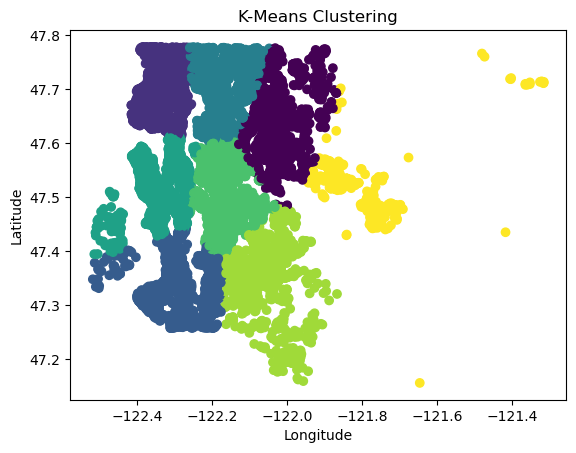

In [48]:
kmeans = KMeans(n_clusters=8, random_state=42)
new_features_df['neighborhood_cluster'] = kmeans.fit_predict(coords)

plt.scatter(new_features_df['long'], new_features_df['lat'], c=new_features_df['neighborhood_cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [49]:
new_features_df.isnull().sum()

id                        0
date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated              0
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
full_bathrooms            0
partial_bathrooms         0
full_floors               0
partial_floors            0
year_sale                 0
month_sale                0
week_day                  0
age                       0
time_since_renovation     0
living_area_ratio         0
bedroom_bathroom_ratio    8
rooms_per_floor           0
relative_living_space     0
relative_lot_space        0
area                

There appear to be 8 blanks in the data. Let us check what is causing this to occur.

In [51]:
null_rows = new_features_df[new_features_df['bedroom_bathroom_ratio'].isnull()]

print("\nAnalysis of Rows with Null bedroom_bathroom_ratio:")
print("-" * 50)
columns_to_check = ['bedrooms', 'full_bathrooms', 'bedroom_bathroom_ratio']
print(null_rows[columns_to_check].to_string())


Analysis of Rows with Null bedroom_bathroom_ratio:
--------------------------------------------------
       bedrooms  full_bathrooms  bedroom_bathroom_ratio
875           0               0                     NaN
3119          0               0                     NaN
6994          0               0                     NaN
9773          0               0                     NaN
9854          0               0                     NaN
14423         0               0                     NaN
18379         0               0                     NaN
19452         0               0                     NaN


It would seem that the null values are caused by houses with 0 bedrooms and full_bathrooms. The NaN values will be replaced by zeroes.

In [53]:
new_features_df = new_features_df.replace(np.nan, 0)
new_features_df.isnull().sum()

id                        0
date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated              0
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
full_bathrooms            0
partial_bathrooms         0
full_floors               0
partial_floors            0
year_sale                 0
month_sale                0
week_day                  0
age                       0
time_since_renovation     0
living_area_ratio         0
bedroom_bathroom_ratio    0
rooms_per_floor           0
relative_living_space     0
relative_lot_space        0
area                

Now that the data is all ready, we will copy this data into `results_df` for further analysis in the following sections. A copy of this dataframe is also saved into `new_features.csv` for better visualization.

In [55]:
result_df = new_features_df
HousePrices.save_dataframe(new_features_df, 'new_features.csv')

True

## 6. Exploratory Data Analysis

Explain what charts show and what insights can be seen from it. It is required ro use statistical techniques. You may use techniques not discussed in class. 

// I think we should try ML modelling as well since madali lng naman ung topic and the dataset was made for it anyway

## 7. Summary of Findings and Recommendations

Lorem ipsum.

## 8. Future Work

Include gantt chart that has a timeline of the enxt steps if you are given 2-4 months to continue this project. <br>
If you did not implement ML, what are the candidate techniques that you plan. Give an explanation: what are the possible benefits or improvements of these ML techniques from what you implements in EDA and details. <br>
If you were able to implement ML, what are other or more advanced techniques that you plan to implement? Include details and how these compare to the one you implemented. <br>

## 9. References

You are encouraged to look at existing solutions online and learn from them. 

King County Government. (2013). King County Zip Code Boundaries. https://your.kingcounty.gov/GIS/web/Web/VMC/boundaries/zipcodes.pdf